### Exercice 1 – Analyse d’un signal périodique par morceaux.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.fft as fft
import os
import sys
sys.path.append('./FichiersTP2Signal')
#mettre le chemin où vous allez récupérer vos modules.
%matplotlib inline
from wavtools import *

### Exercice 2 – Analyse d’un signal périodique par morceaux.

In [ ]:
def calc_hanning(m,n):
    return .5*(1 - np.cos(2*np.pi*np.linspace(1,m,m)/(n+1)))                 

def hanning(n):
    if (n%2) == 0:
        # Even length window
        half = n//2
        w = calc_hanning(half,n)
        w = np.concatenate((w,w[::-1]))
    else:
        # Odd length window
        half = (n+1)//2
        w = calc_hanning(half,n)
        z=w[::-1]
        w = np.concatenate((w,z[1:]))
    return w

In [ ]:
# Chargement d’un fichier audio
signal, freq = open_wave("./FichiersTP2Signal/aherohasfallen.wav")


In [ ]:
# Enregistrement d’un fichier audio

sound = np.zeros(88200)
save_wave(sound, "./FichiersTP2Signal/aherohasfallen.wav", 44100)


# Exercice 1 – Analyse d’un signal périodique par morceaux.

1) Fabriquer un signal contenant la fréquence $F_{1}=440 \mathrm{~Hz}$ pendant $2 s$ et $F_{2}=600 \mathrm{~Hz}$ pendant $3 \mathrm{~s}$ avec une fréquence d'échantillonnage $F e=2400 \mathrm{~Hz}$.

In [ ]:
F1 = 440
T1 = 2
F2 = 600
T2 = 3

T = T1+T2
Fe = 2400

Ntot = Fe*T

In [ ]:
t1 = np.linspace(0, T1, Fe*T1)
t2 = np.linspace(T1, T2, Fe*T2)

signal1 = np.sin(2*np.pi*F1*t1)
signal2 = np.sin(2*np.pi*F2*t2)

t = np.concatenate((t1, t2))
signal = np.concatenate((signal1, signal2))

In [ ]:
plt.plot(t, signal)
plt.xlim((0, 0.01))

In [ ]:
plt.plot(t, signal)
plt.xlim((T1, T1+0.01))


2) Déterminer la taille minimale de la fenêtre temporelle permettant de capturer les deux fréquences présentes dans le signal.

In [ ]:
def fft_fenetre(signal, windows):
    N = windows.size
    w = hanning(N)
    Freq = np.fft.fftshift(np.fft.fftfreq(N, 1/Fe))
    E = 1/N*np.abs(np.fft.fftshift(np.fft.fft(w*signal[windows])))
    return Freq, E
    

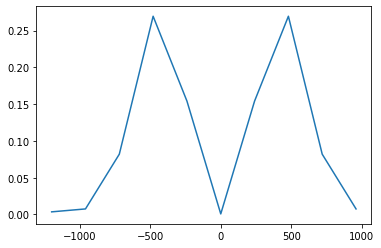

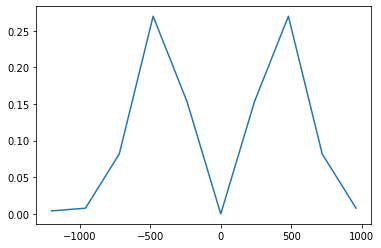

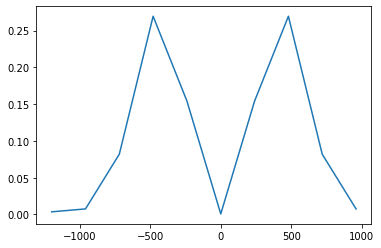

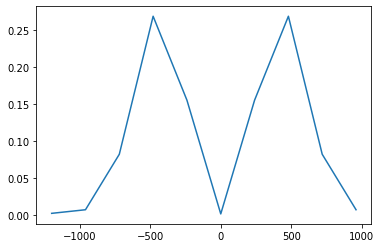

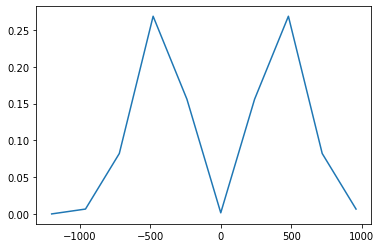

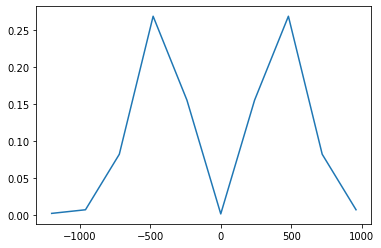

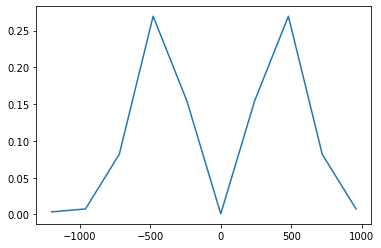

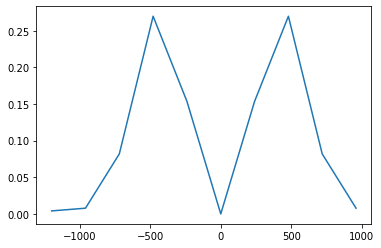

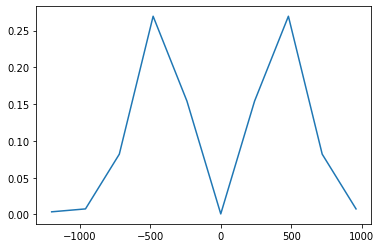

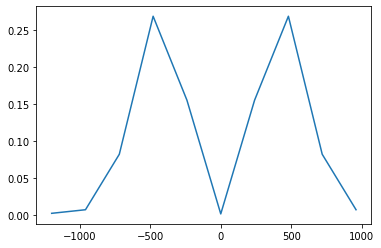

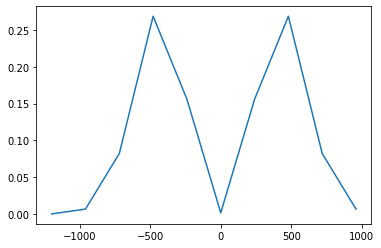

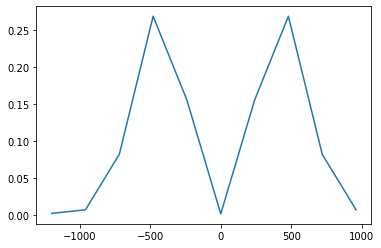

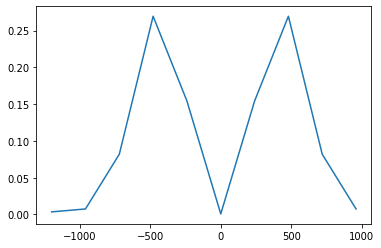

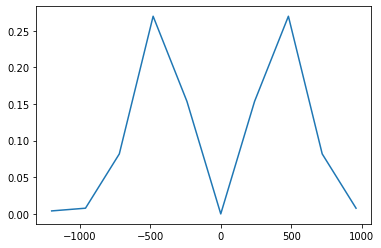

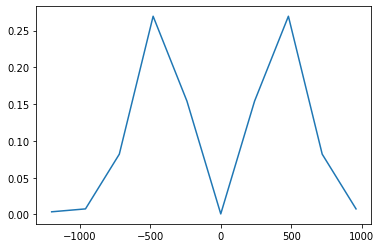

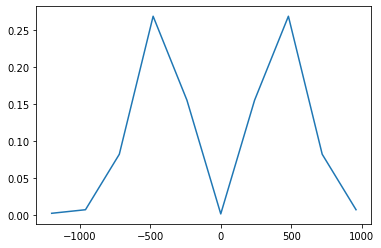

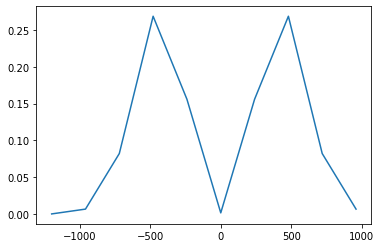

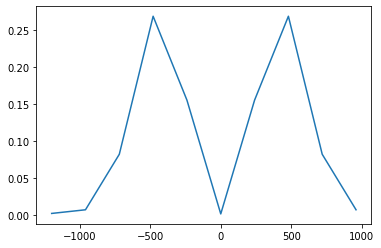

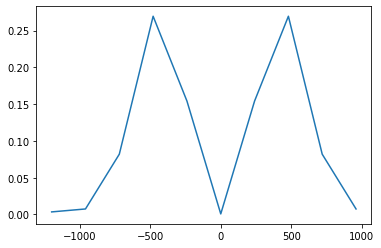

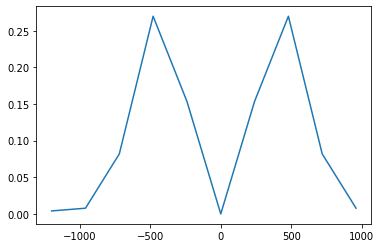

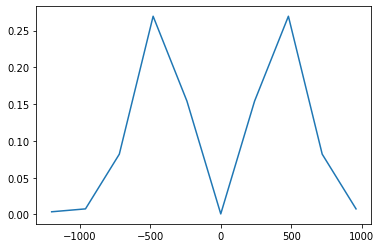

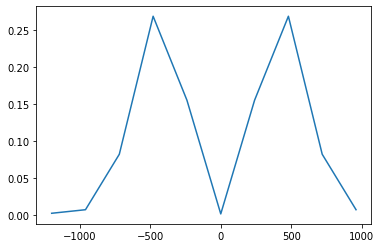

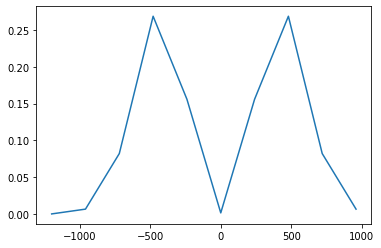

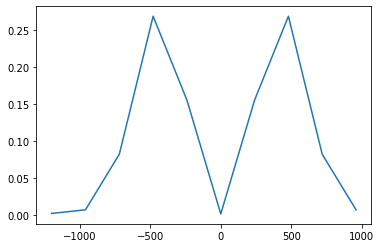

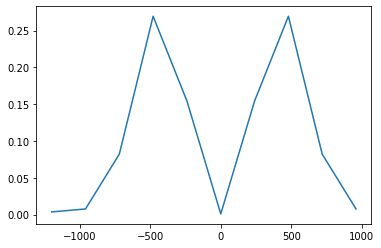

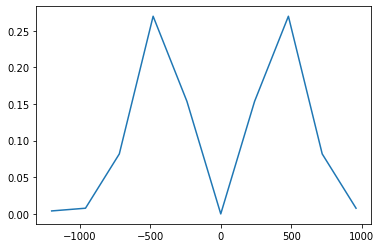

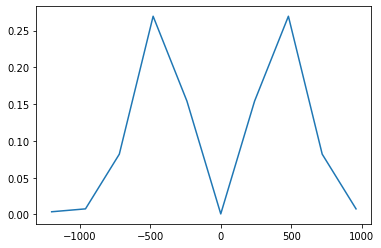

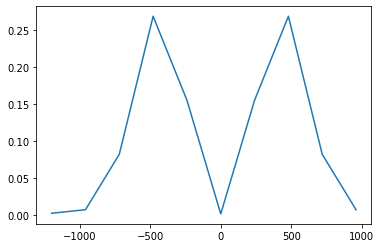

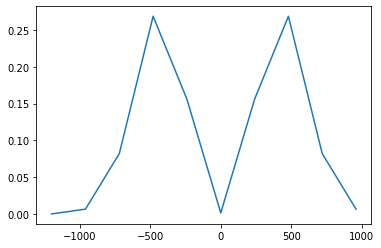

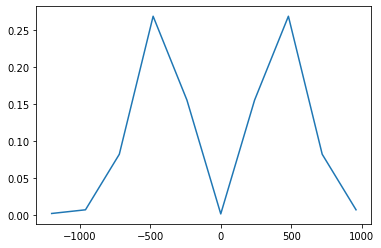

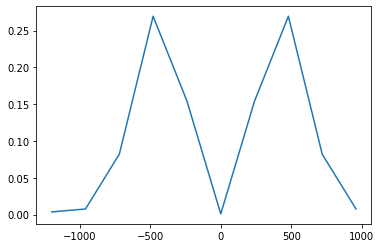

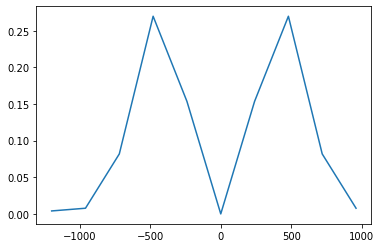

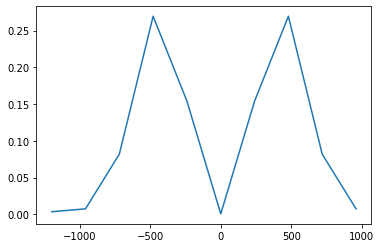

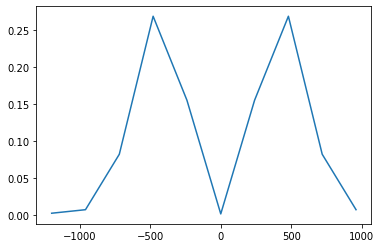

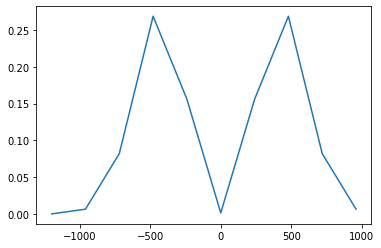

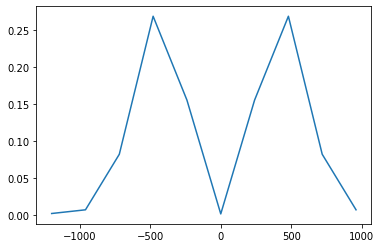

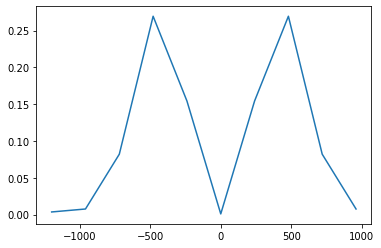

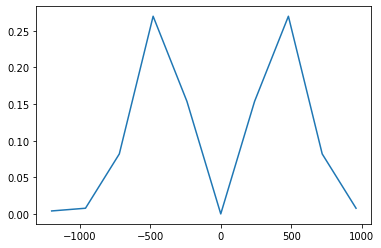

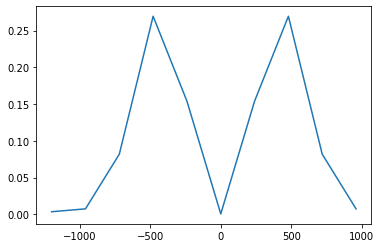

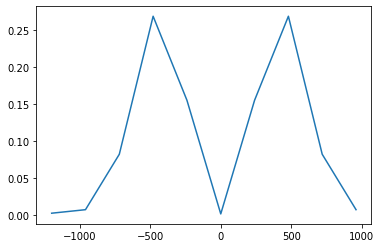

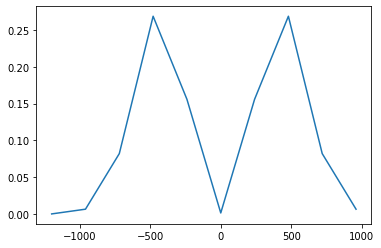

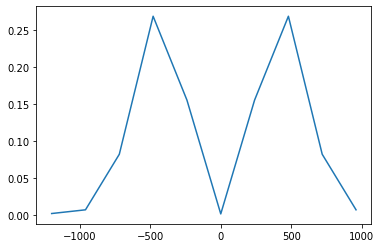

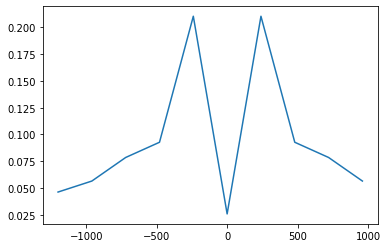

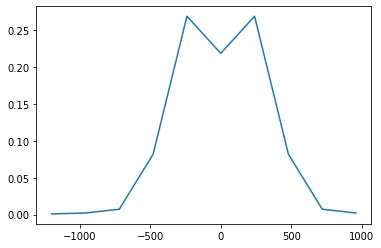

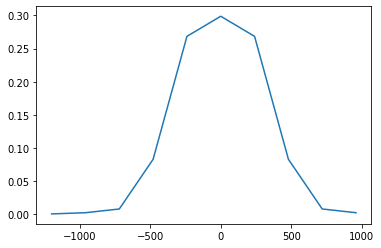

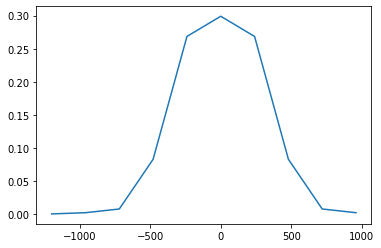

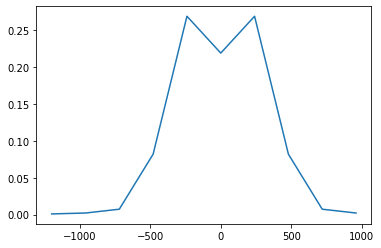

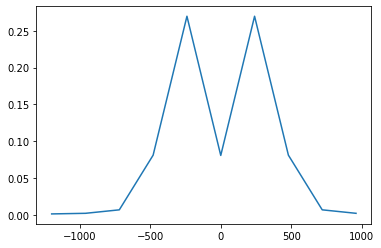

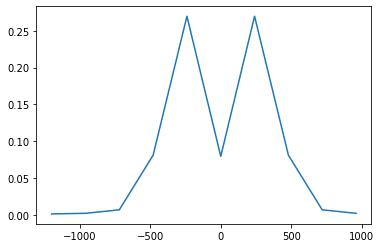

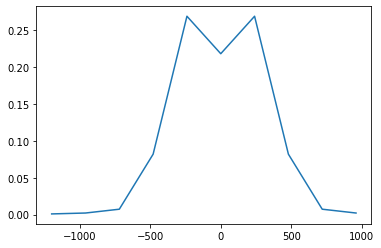

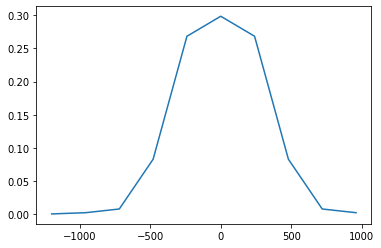

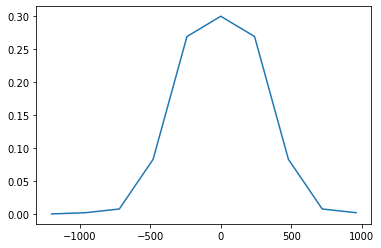

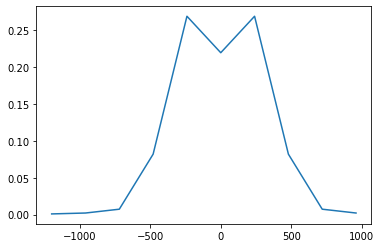

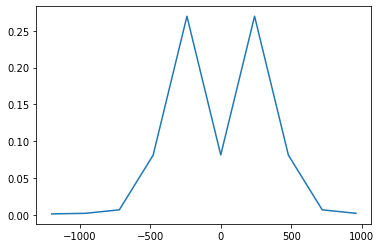

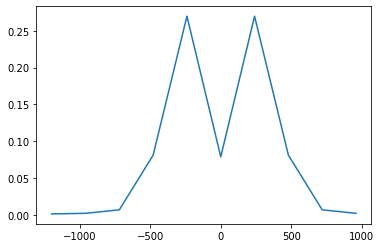

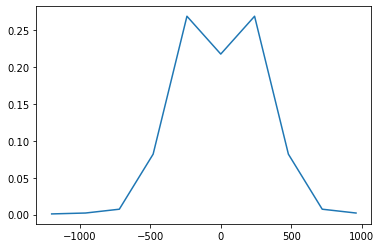

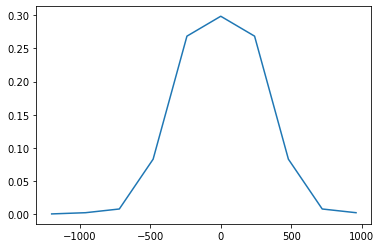

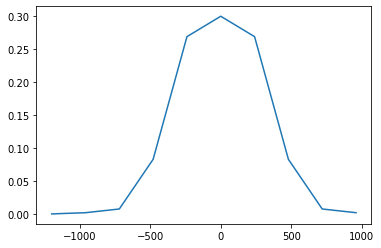

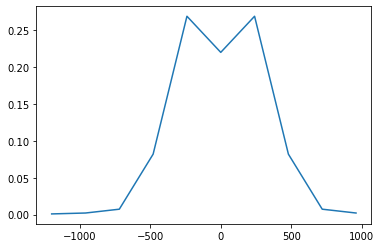

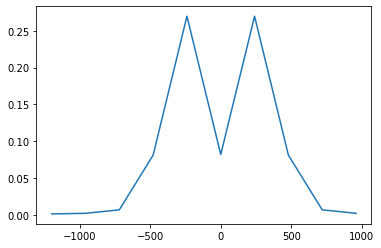

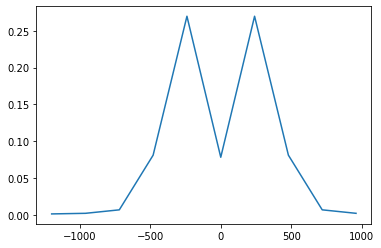

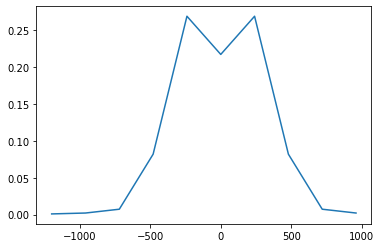

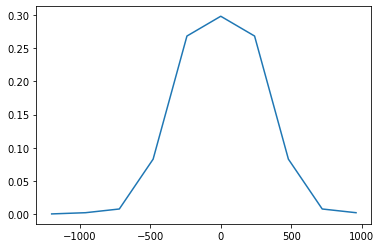

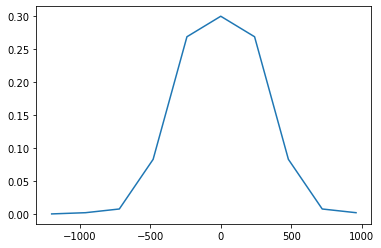

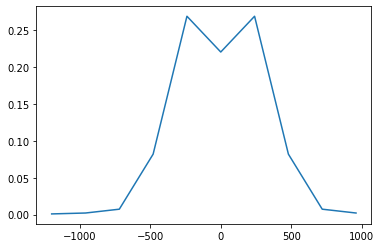

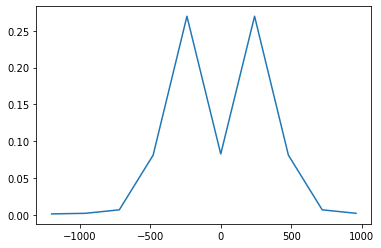

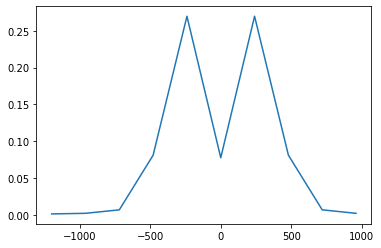

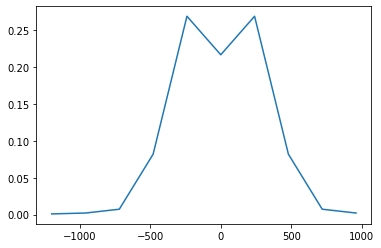

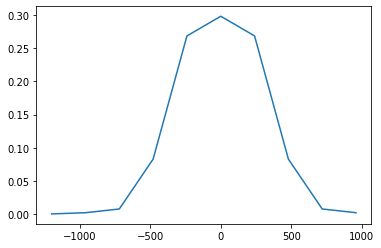

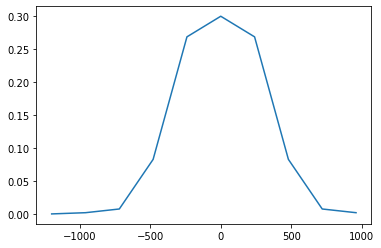

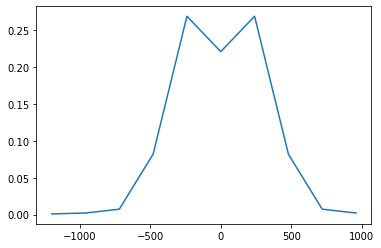

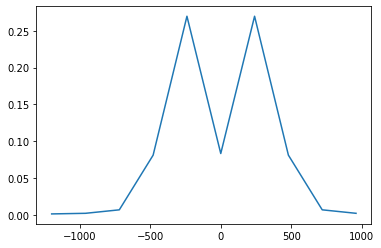

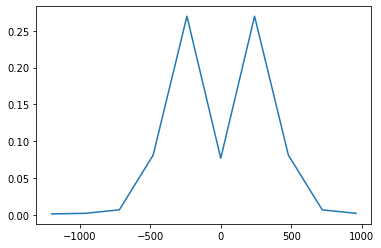

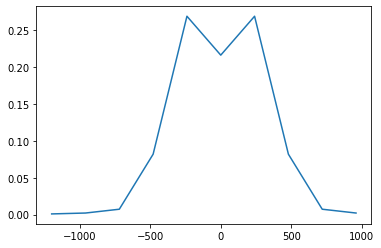

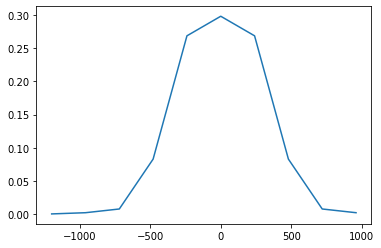

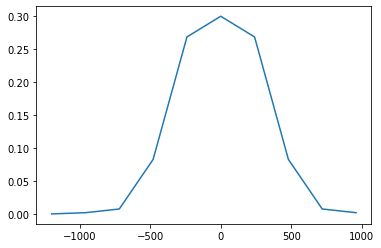

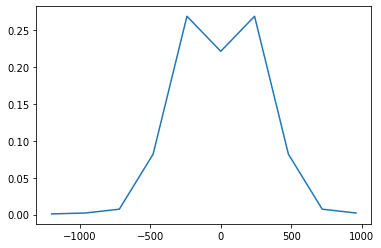

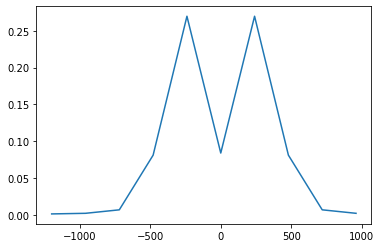

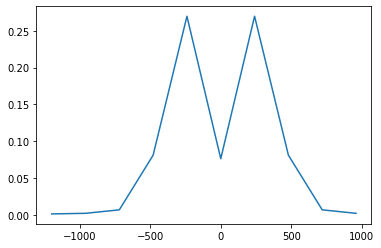

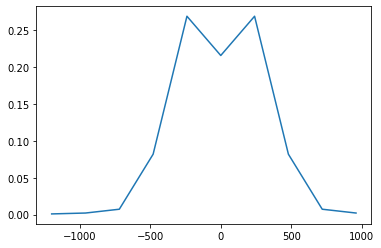

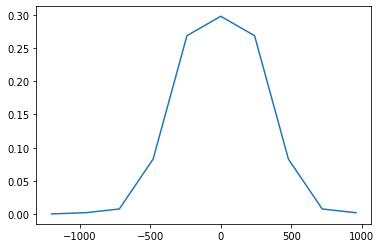

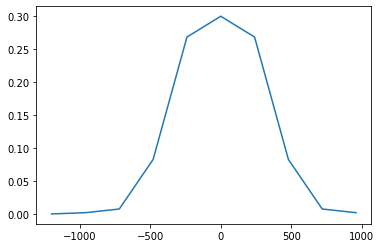

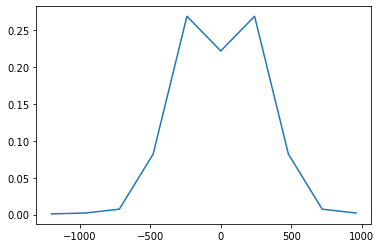

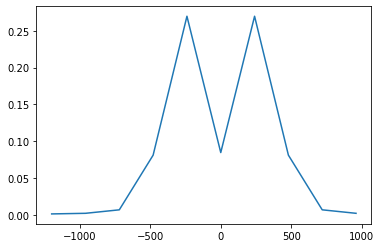

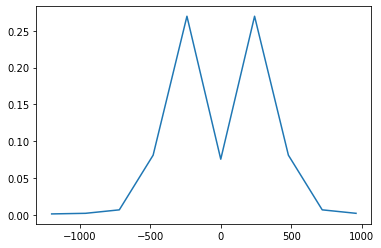

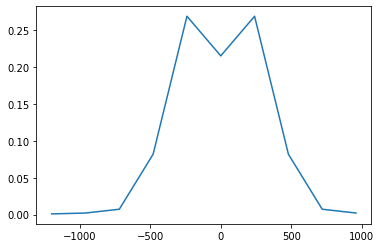

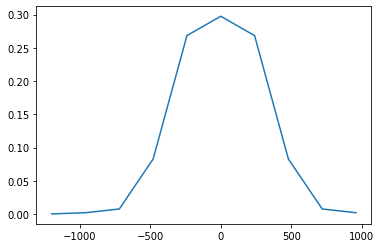

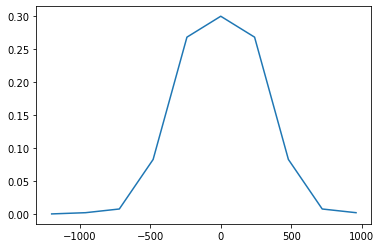

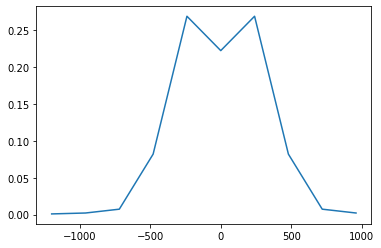

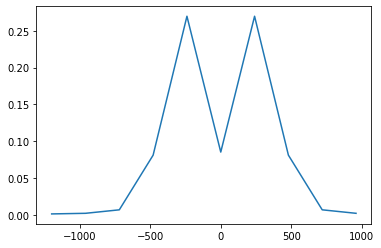

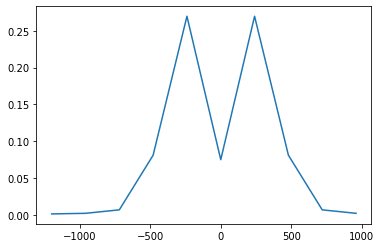

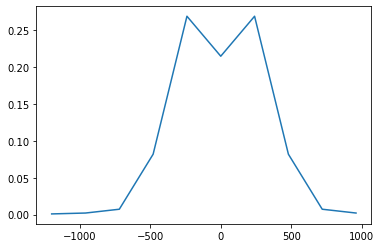

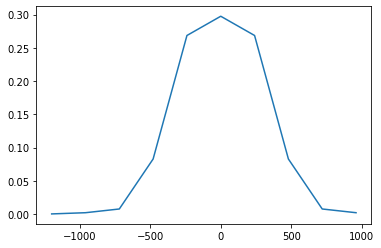

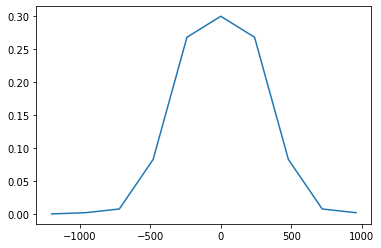

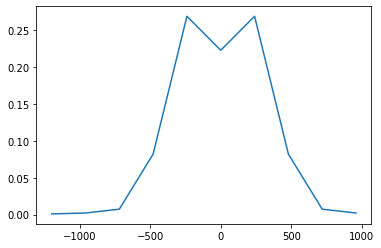

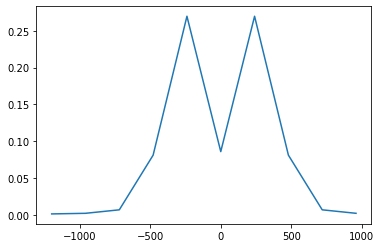

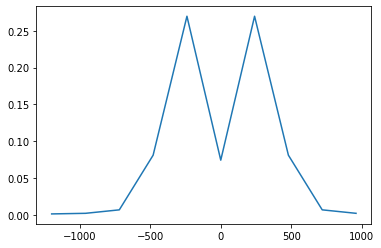

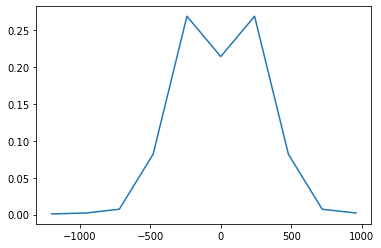

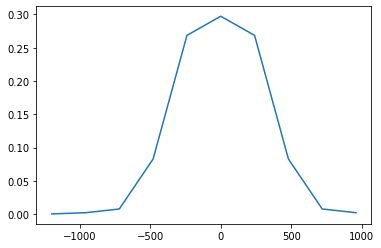

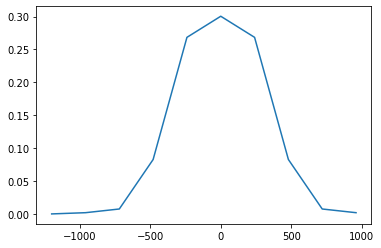

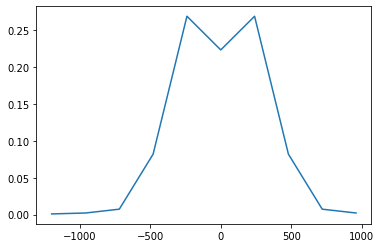

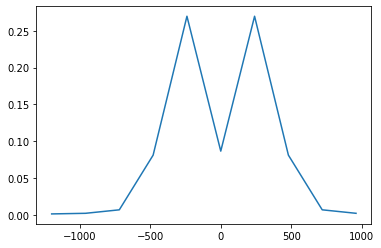

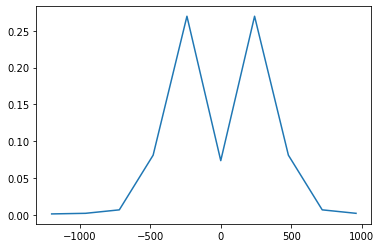

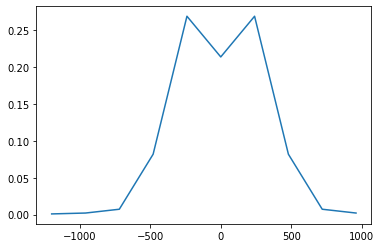

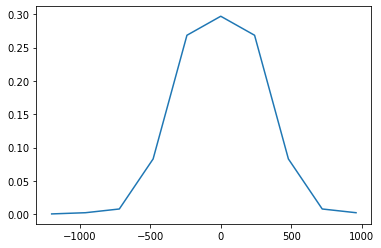

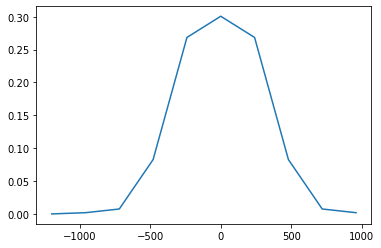

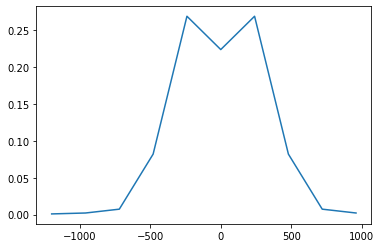

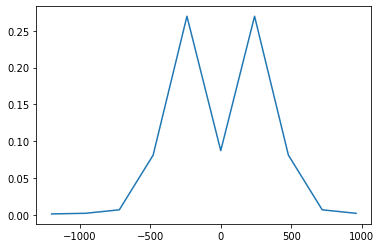

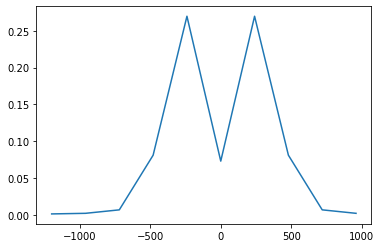

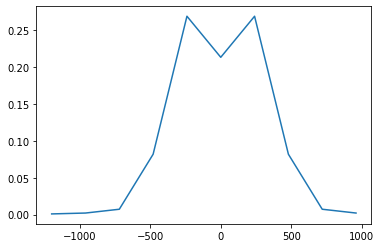

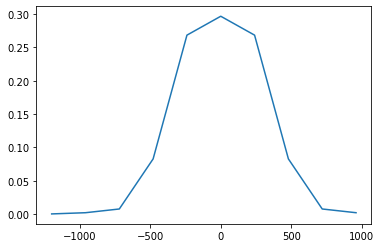

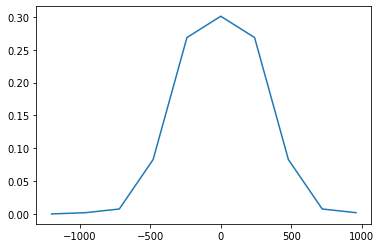

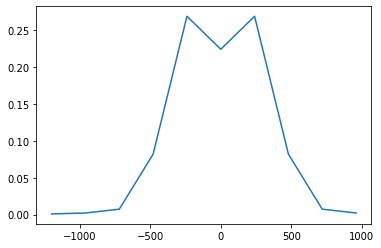

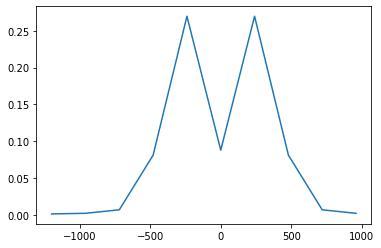

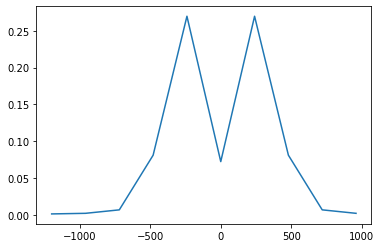

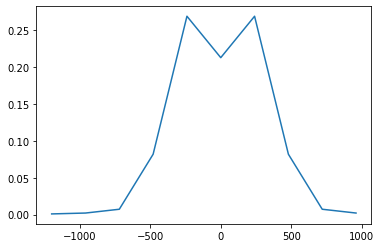

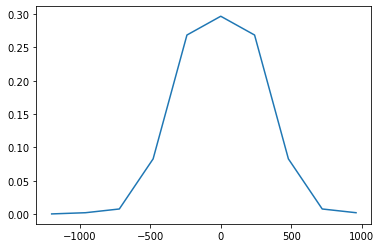

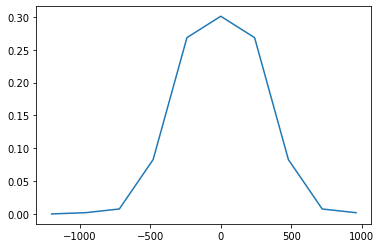

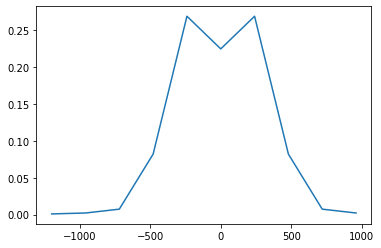

In [94]:
Nwindows = 10
p = 5

Freq_list = []
E_list = []
T_list = []

for k in range(0, N//p):
    
    windows = np.arange(k*p, k*p+Nwindows)
    Freq, E = fft_fenetre(signal, windows)

    plt.plot(Freq, E)
    plt.show()
    
T_list = np.array(T_list)


In [ ]:
Freq.shape

In [ ]:
E.shape

In [ ]:
T_list

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
for k in range(0, N//p):
    windows = np.arange(k*p, k*p+Nwindows)


In [ ]:
windows.shape
